# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('../../../../Datasets/SINASC_RO_2019.csv', sep = ',')
sinasc_raw['HORANASC'].head()

0    1620.0
1    1830.0
2     915.0
3     835.0
4     750.0
Name: HORANASC, dtype: float64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
# utilizando pd.cut
sinasc_raw['munResLatFaixa'] = pd.cut(sinasc_raw['munResLat'], bins=[-90, -10.5, 90], labels=['abaixo', 'acima'])

In [7]:
sinasc_raw.pivot_table(
    index='munResLatFaixa',
    values=['HORANASC', 'APGAR5'],
    aggfunc=['mean', 'std', 'min']
)

mean                    std                min         
                  APGAR5     HORANASC    APGAR5    HORANASC APGAR5 HORANASC
munResLatFaixa                                                             
abaixo          9.138788  1263.856923  0.805381  544.612163    0.0      0.0
acima           9.216551  1270.756755  0.774741  601.592022    0.0      0.0

In [10]:
sinasc_raw.dropna(subset=['HORANASC', 'APGAR5']).groupby('munResLatFaixa')[['HORANASC','APGAR5']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']).stack().round(2)

HORANASC     APGAR5
munResLatFaixa                               
abaixo         sum     16369536.00  118262.00
               mean        1264.94       9.14
               min            0.00       0.00
               max         2358.00      10.00
               median      1225.00       9.00
               std          543.98       0.81
               var       295910.35       0.65
acima          sum     17745311.00  128682.00
               mean        1270.97       9.22
               min            0.00       0.00
               max         2359.00      10.00
               median      1235.50       9.00
               std          601.38       0.77
               var       361653.21       0.60

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [11]:
# utilizando pd.cut
sinasc_raw['munResAreaFaixa'] = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['abaixo', 'acima'])

In [12]:
sinasc_raw.pivot_table(
    index='munResAreaFaixa',
    values=['HORANASC', 'APGAR5'],
    aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

mean                    std                min         
                   APGAR5     HORANASC    APGAR5    HORANASC APGAR5 HORANASC
munResAreaFaixa                                                             
abaixo           9.130351  1249.634287  0.801124  527.978631    0.0      0.0
acima            9.190836  1271.696059  0.787591  585.503531    0.0      0.0

In [13]:
sinasc_raw.dropna(subset=['HORANASC', 'APGAR5']).groupby('munResAreaFaixa')[['HORANASC','APGAR5']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']).stack().round(2)

HORANASC     APGAR5
munResAreaFaixa                               
abaixo          sum      6495621.00   47467.00
                mean        1249.40       9.13
                min            0.00       0.00
                max         2357.00      10.00
                median      1200.00       9.00
                std          527.79       0.80
                var       278560.50       0.64
acima           sum     27619226.00  199477.00
                mean        1272.54       9.19
                min            0.00       0.00
                max         2359.00      10.00
                median      1236.00       9.00
                std          585.03       0.79
                var       342264.26       0.62

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
# utilizando pd.cut
sinasc_raw['munResAltFaixa'] = pd.cut(sinasc_raw['munResAlt'], bins=[-np.inf, 300, 600, 900, np.inf], labels=['abaixo 300', '300 a 600', '600 a 900', 'acima 900'])

In [15]:
sinasc_raw.pivot_table(
    index='munResAltFaixa',
    values=['HORANASC', 'APGAR5'],
    aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)   

sum                  mean                 min           \
                  APGAR5    HORANASC    APGAR5     HORANASC APGAR5 HORANASC   
munResAltFaixa                                                                
abaixo 300      224562.0  31082465.0  9.186418  1267.637235    0.0      0.0   
300 a 600        22577.0   3146039.0  9.107301  1265.502414    0.0      0.0   
600 a 900            0.0         0.0       NaN          NaN    NaN      NaN   
acima 900            0.0         0.0       NaN          NaN    NaN      NaN   

                  max          median                std              \
               APGAR5 HORANASC APGAR5 HORANASC    APGAR5    HORANASC   
munResAltFaixa                                                         
abaixo 300       10.0   2359.0    9.0   1232.0  0.797883  579.930471   
300 a 600        10.0   2358.0    9.0   1204.5  0.710653  522.951588   
600 a 900         NaN      NaN    NaN      NaN       NaN         NaN   
acima 900         NaN      NaN    NaN      NaN       NaN         NaN   

                     var                 
                  APGAR5       HORANASC  
munResAltFaixa                           
abaixo 300      0.636618  336319.351042  
300 a 600       0.505027  273478.363576  
600 a 900            NaN            NaN  
acima 900            NaN            NaN

In [16]:
sinasc_raw.dropna(subset=['HORANASC', 'APGAR5']).groupby('munResAltFaixa')[['HORANASC','APGAR5']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']).stack().round(2)

HORANASC     APGAR5
munResAltFaixa                               
abaixo 300     sum     30973538.00  224377.00
               mean        1268.11       9.19
               min            0.00       0.00
               max         2359.00      10.00
               median      1233.00       9.00
               std          579.54       0.80
               var       335862.16       0.64
300 a 600      sum      3141309.00   22567.00
               mean        1267.68       9.11
               min            0.00       0.00
               max         2358.00      10.00
               median      1205.00       9.00
               std          522.13       0.71
               var       272615.01       0.50
600 a 900      sum            0.00       0.00
acima 900      sum            0.00       0.00

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [17]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [19]:
sinasc_raw['regiao'] = sinasc_raw['munResNome'].map(imediatas)

<Axes: xlabel='DTNASC'>

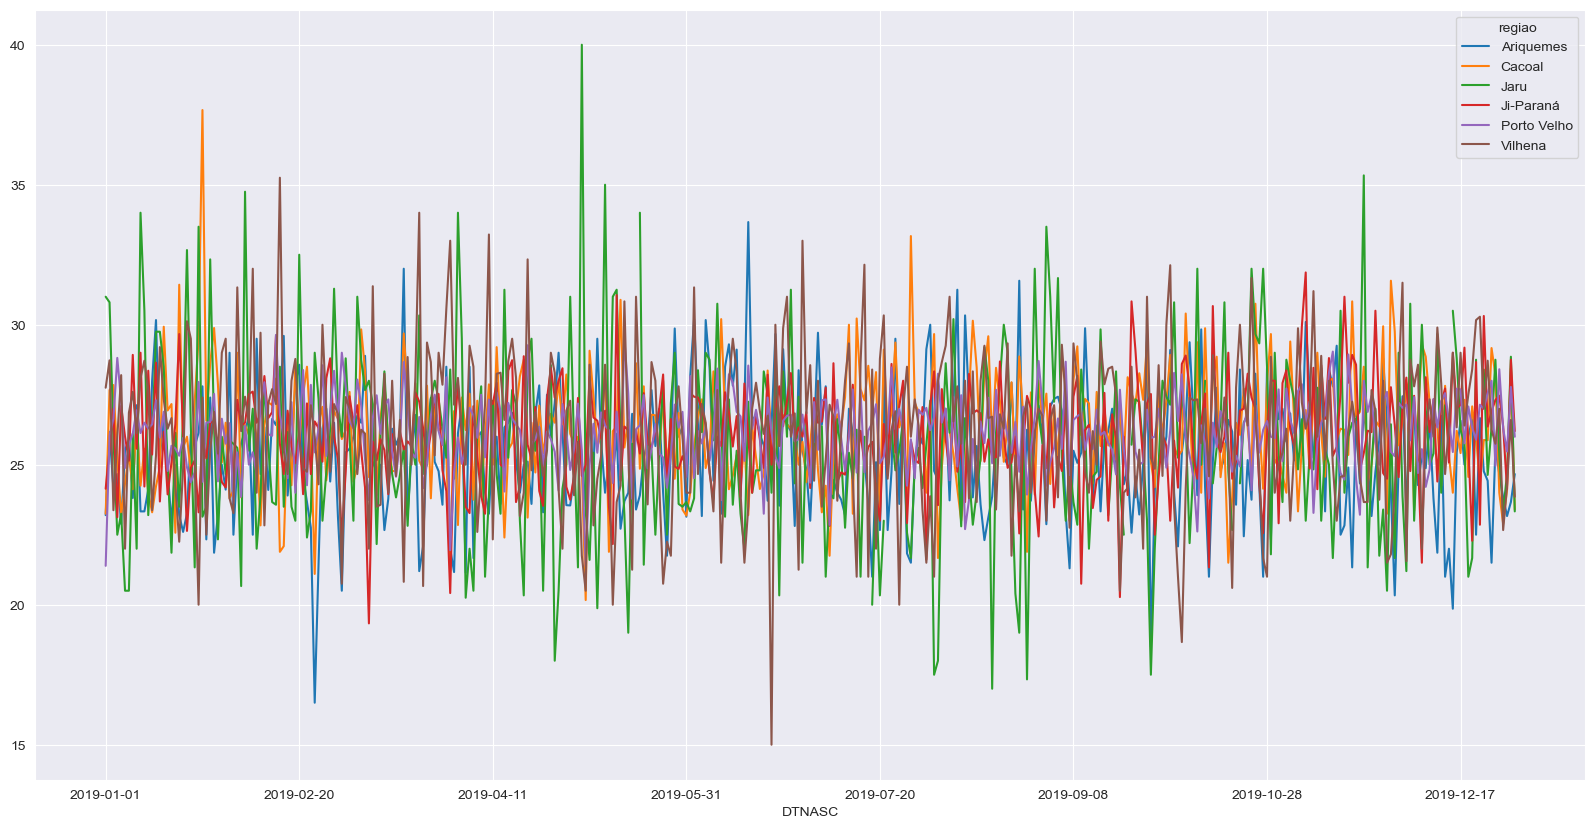

In [23]:
# plotar a idade média das mulheres ao longo do tempo
sinasc_raw.groupby(['DTNASC', 'regiao'])['IDADEMAE'].mean().unstack().plot(figsize=(20, 10))

Está de difícil visualizar mas Jaru é a região que parece mais ter registrado nascimentos ao longo do tempo .

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [25]:
idh_map = {
    "Porto Velho": "alto",
    "Vilhena": "alto",
    "Cacoal": "alto",
    "Ji-Paraná": "alto",
    "Pimenta Bueno": "alto",
    "Ariquemes": "alto",
    "Rolim de Moura": "alto",
    "Cerejeiras": "médio",
    "Jaru": "médio",
    "Colorado do Oeste": "médio",
    "Ouro Preto do Oeste": "médio",
    "Espigão d'Oeste": "médio",
    "Santa Luzia d'Oeste": "médio",
    "Pimenteiras do Oeste": "médio",
    "Presidente Médici": "médio",
    "Castanheiras": "médio",
    "Guajará-Mirim": "médio",
    "Chupinguaia": "médio",
    "Cabixi": "médio",
    "Candeias do Jamari": "médio",
    "São Felipe d'Oeste": "médio",
    "Cacaulândia": "médio",
    "São Miguel do Guaporé": "médio",
    "Mirante da Serra": "médio",
    "Alvorada d'Oeste": "médio",
    "Teixeirópolis": "médio",
    "Nova Brasilândia d'Oeste": "médio",
    "Rio Crespo": "médio",
    "Primavera de Rondônia": "médio",
    "Alta Floresta d'Oeste": "médio",
    "Ministro Andreazza": "médio",
    "Novo Horizonte do Oeste": "médio",
    "Vale do Paraíso": "médio",
    "Alto Paraíso": "médio",
    "Parecis": "médio",
    "Buritis": "médio",
    "Itapuã do Oeste": "médio",
    "Corumbiara": "médio",
    "Cujubim": "médio",
    "Costa Marques": "médio",
    "São Francisco do Guaporé": "médio",
    "Urupá": "médio",
    "Monte Negro": "médio",
    "Seringueiras": "baixo",
    "Governador Jorge Teixeira": "baixo",
    "Machadinho d'Oeste": "baixo",
    "Campo Novo de Rondônia": "baixo",
    "Alto Alegre dos Parecis": "baixo",
    "Theobroma": "baixo",
    "Nova União": "baixo",
    "Nova Mamoré": "baixo",
    "Vale do Anari": "muito baixo"
}

In [26]:
sinasc_raw['IDH'] = sinasc_raw['munResNome'].map(idh_map)

In [27]:
# gerando agrupamentos com idh
sinasc_raw.groupby('IDH')[[ 'APGAR5', 'IDADEMAE', 'QTDFILVIVO']].agg('mean')

,APGAR5,IDADEMAE,QTDFILVIVO
IDH,,,
alto,9.171668,26.280332,1.033960
baixo,9.292208,25.206813,1.046875
muito baixo,8.946237,26.096774,1.173913
médio,9.225567,25.848191,1.093111


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [28]:
ifdm_map = {
    "Ariquemes": "moderado",
    "Vilhena": "moderado",
    "Pimenta Bueno": "moderado",
    "Porto Velho": "moderado",
    "Ji-Paraná": "moderado",
    "Cacoal": "moderado",
    "Santa Luzia d'Oeste": "moderado",
    "Rolim de Moura": "moderado",
    "Chupinguaia": "moderado",
    "São Miguel do Guaporé": "moderado",
    "Pimenteiras do Oeste": "moderado",
    "Teixeirópolis": "moderado",
    "Colorado do Oeste": "moderado",
    "Jaru": "moderado",
    "Rio Crespo": "moderado",
    "Primavera de Rondônia": "moderado",
    "Alta Floresta d'Oeste": "moderado",
    "Ouro Preto do Oeste": "moderado",
    "São Francisco do Guaporé": "moderado",
    "Candeias do Jamari": "moderado",
    "Buritis": "moderado",
    "São Felipe d'Oeste": "moderado",
    "Presidente Médici": "moderado",
    "Cerejeiras": "moderado",
    "Monte Negro": "moderado",
    "Urupá": "moderado",
    "Espigão d'Oeste": "regular",
    "Seringueiras": "regular",
    "Alvorada d'Oeste": "regular",
    "Itapuã do Oeste": "regular",
    "Cabixi": "regular",
    "Novo Horizonte do Oeste": "regular",
    "Nova Brasilândia d'Oeste": "regular",
    "Vale do Paraíso": "regular",
    "Corumbiara": "regular",
    "Alto Paraíso": "regular",
    "Cacaulândia": "regular",
    "Vale do Anari": "regular",
    "Ministro Andreazza": "regular",
    "Costa Marques": "regular",
    "Nova União": "regular",
    "Guajará-Mirim": "regular",
    "Mirante da Serra": "regular",
    "Parecis": "regular",
    "Castanheiras": "regular",
    "Theobroma": "regular",
    "Machadinho d'Oeste": "regular",
    "Campo Novo de Rondônia": "regular",
    "Nova Mamoré": "regular",
    "Cujubim": "regular",
    "Alto Alegre dos Parecis": "regular",
    "Governador Jorge Teixeira": "regular"
}

In [29]:
sinasc_raw['IFDM'] = sinasc_raw['munResNome'].map(ifdm_map)

In [30]:
sinasc_raw.groupby('IFDM')[[ 'APGAR5', 'IDADEMAE', 'QTDFILVIVO']].agg('mean')

,APGAR5,IDADEMAE,QTDFILVIVO
IFDM,,,
moderado,9.184522,26.226921,1.030350
regular,9.233004,25.412005,1.172404


No IFDM E IDH vemos que os municipios com IFDM Menor o Apagar5 é maior, a idade da mãe é menor e a quantidade de filhos vivos é maior. pode se dizer então que estão tendo mais filhos e mais cedo e isso com certeza afeta no apgar5. Mas no IDH o muito baixo apresentou pior apgar5 enquanto o baixo apresentou o melhor apgar5. mostrando que há um limite onde a curva do IDH se cair muito começa a afetar o apgar5 de maneira extremamente negativa.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [31]:
pib_map = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Nova União": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [32]:
sinasc_raw['PIB'] = sinasc_raw['munResNome'].map(pib_map)

In [33]:
sinasc_raw.groupby('PIB')[[ 'APGAR5', 'IDADEMAE', 'QTDFILVIVO']].agg('mean')

,APGAR5,IDADEMAE,QTDFILVIVO
PIB,,,
Acima de 1 Bilhão,9.166223,26.265562,1.026435
Acima de 100 Milhões,9.137759,25.745919,1.030325
Acima de 200 Milhões,9.319846,25.146435,1.010526
Acima de 300 Milhões,9.092000,25.706070,1.062097
Acima de 500 Milhões,9.364374,25.785927,1.228385
Até 100 Milhões,9.095491,26.519894,1.032258


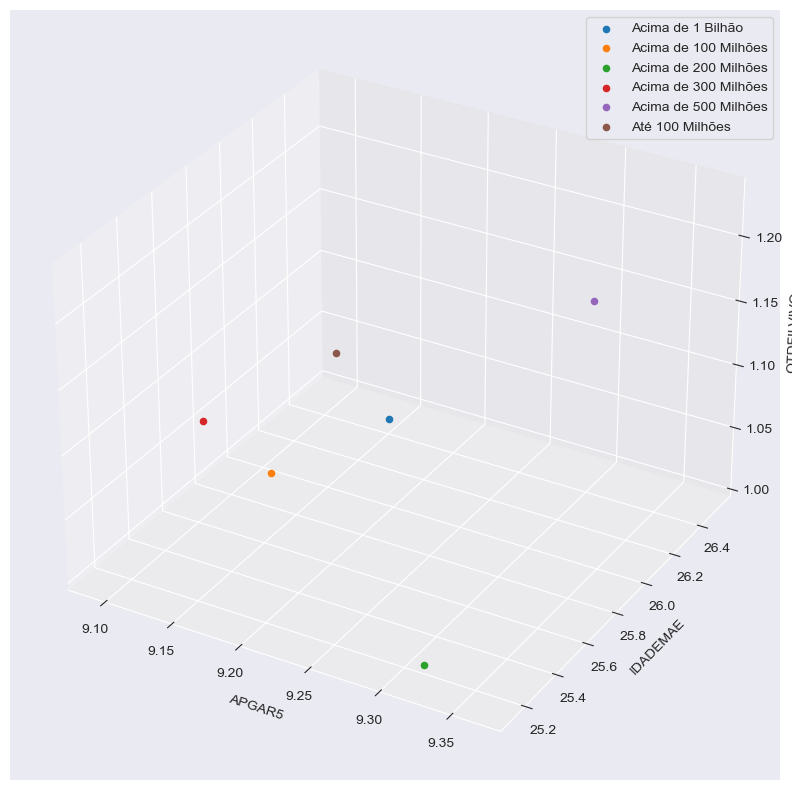

In [36]:
# plotando em 3d o groupby do PIB
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

for i, (PIB, group) in enumerate(sinasc_raw.groupby('PIB')):
    ax.scatter(
        group['APGAR5'].mean(),
        group['IDADEMAE'].mean(),
        group['QTDFILVIVO'].mean(),
        label=PIB
    )

ax.set_xlabel('APGAR5')
ax.set_ylabel('IDADEMAE')
ax.set_zlabel('QTDFILVIVO')

plt.legend()    
plt.show()

In [40]:
import plotly.graph_objects as go

# Criando um DataFrame agrupado
grouped_df = sinasc_raw.groupby('PIB')[['APGAR5', 'IDADEMAE', 'QTDFILVIVO']].mean().reset_index()

# Criando o gráfico 3D interativo
fig = go.Figure(data=[go.Scatter3d(
    x=grouped_df['APGAR5'],
    y=grouped_df['IDADEMAE'],
    z=grouped_df['QTDFILVIVO'],
    text=grouped_df['PIB'],  # texto que será exibido quando o mouse passar sobre um ponto
    hovertext=grouped_df['PIB'],  # texto que será exibido quando o mouse passar sobre um ponto
    mode='markers',
    marker=dict(
        size=12,
        color=grouped_df.index,  # definindo a cor para corresponder ao índice do DataFrame
        colorscale='Viridis',   # escolha de corescale
        opacity=0.8
    )
)])

# Definindo os rótulos dos eixos
fig.update_layout(scene = dict(
    xaxis_title='APGAR5',
    yaxis_title='IDADEMAE',
    zaxis_title='QTDFILVIVO'),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Novamente podemos ver que a relação não é linear pode ser uma relação em formato de sino onde o pib muito baixo e muito alto tem apgar5 pior, enquanto o pib baixo e médio tem apgar5 melhor e se vai para os extremos a idade média da mãe aumenta, a quantidade de filhos vivos diminui e o apgar5 piora.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.